Arynda Anna Salsabiela

## Glass Identification Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = "https://archive.ics.uci.edu/static/public/42/data.csv"
# load dataset into Pandas DataFrame
df = pd.read_csv(url)

In [ ]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df['RI'] = pd.to_numeric(df['RI'], errors='coerce')
df['Na'] = pd.to_numeric(df['Na'], errors='coerce')
df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')
df['Al'] = pd.to_numeric(df['Al'], errors='coerce')
df['Si'] = pd.to_numeric(df['Si'], errors='coerce')
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['Ca'] = pd.to_numeric(df['Ca'], errors='coerce')
df['Ba'] = pd.to_numeric(df['Ba'], errors='coerce')
df['Fe'] = pd.to_numeric(df['Fe'], errors='coerce')

In [ ]:
features = ['RI', 'Na', 'Mg','Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['Type_of_glass']].values
# Standardizing out the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Type_of_glass']]], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,Type_of_glass
0,1.151140,-0.529488,1
1,-0.574137,-0.759788,1
2,-0.940160,-0.929836,1
3,-0.142083,-0.961677,1
4,-0.351092,-1.091249,1
...,...,...,...
209,-2.383835,3.061677,7
210,-2.397652,3.108236,7
211,-1.680246,3.284823,7
212,-2.369748,2.756873,7


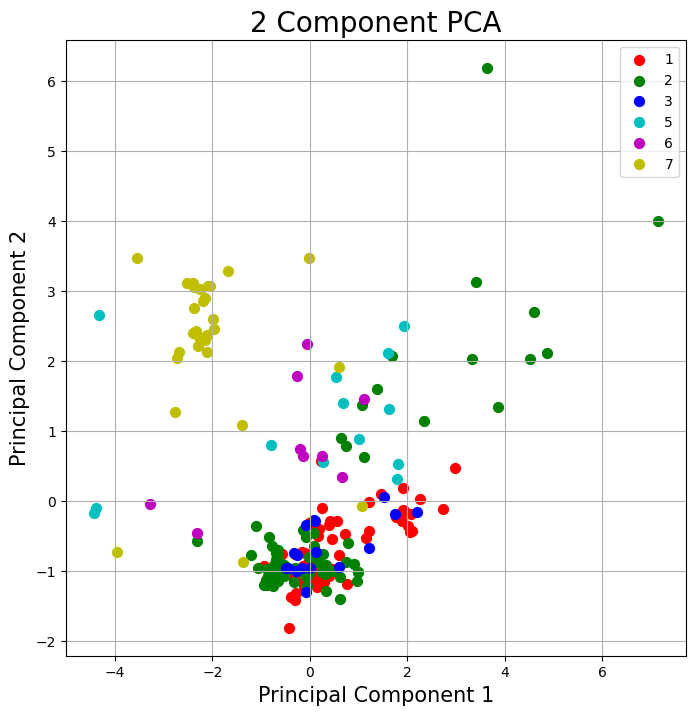

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [1, 2, 3, 5, 6, 7]
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for target, color in zip (targets,colors):
  indicesToKeep = finalDf['Type_of_glass'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
             , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 ])